# 1. Make an API Key and Pull 3 Years Worth of Data

In [1]:
import requests
import json
import datetime
import credentials
import pandas as pd
import csv
import altair as alt

# My API Key
api_key = credentials.api_key

# Pulling CVS Health Data
symbol = 'CVS'

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol='\
    f'{symbol}&apikey={api_key}&outputsize=full'
r = requests.get(url)
data = r.json()

In [2]:
print(data['Time Series (Daily)'].keys())

dict_keys(['2023-10-20', '2023-10-19', '2023-10-18', '2023-10-17', '2023-10-16', '2023-10-13', '2023-10-12', '2023-10-11', '2023-10-10', '2023-10-09', '2023-10-06', '2023-10-05', '2023-10-04', '2023-10-03', '2023-10-02', '2023-09-29', '2023-09-28', '2023-09-27', '2023-09-26', '2023-09-25', '2023-09-22', '2023-09-21', '2023-09-20', '2023-09-19', '2023-09-18', '2023-09-15', '2023-09-14', '2023-09-13', '2023-09-12', '2023-09-11', '2023-09-08', '2023-09-07', '2023-09-06', '2023-09-05', '2023-09-01', '2023-08-31', '2023-08-30', '2023-08-29', '2023-08-28', '2023-08-25', '2023-08-24', '2023-08-23', '2023-08-22', '2023-08-21', '2023-08-18', '2023-08-17', '2023-08-16', '2023-08-15', '2023-08-14', '2023-08-11', '2023-08-10', '2023-08-09', '2023-08-08', '2023-08-07', '2023-08-04', '2023-08-03', '2023-08-02', '2023-08-01', '2023-07-31', '2023-07-28', '2023-07-27', '2023-07-26', '2023-07-25', '2023-07-24', '2023-07-21', '2023-07-20', '2023-07-19', '2023-07-18', '2023-07-17', '2023-07-14', '2023-07-

In [3]:
# Making a list of all available dates and saving it as a datetime format
list_of_dates = []
for key in data['Time Series (Daily)'].keys():
    # save the data in a list as a datetime
    list_of_dates.append(datetime.datetime.strptime(key, '%Y-%m-%d'))

# Define the interested years
start_year = 2010
end_year = 2023

# Saving the data from the json file as a dictionary with the date as the key 
# and the data as the value, starting from date that started with 2019
data_dict = {}
for date in list_of_dates:
    if date.year >= start_year and date.year <= end_year:
        data_dict[date] = data['Time Series (Daily)'][str(date.date())]

# Checking the first and last date of the data
print(list(data_dict.keys())[0])
print(list(data_dict.keys())[-1])

2023-10-20 00:00:00
2010-01-04 00:00:00


# 2. Create A List of NYSE and NASDAQ Stock Symbols

In [4]:
# Decide the date for stock list
today = datetime.datetime.today()

CSV_URL = f'https://www.alphavantage.co/query?function=LISTING_STATUS&apikey='\
    f'{api_key}&state=active&date={today}'

nyse_stock_list = []
nasdaq_stock_list = []
nyse_etf_list = []
nasdaq_etf_list = []

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        if row[2] == 'NYSE' and row[3] == 'Stock':
            nyse_stock_list.append(row[0])
        elif row[2] == 'NASDAQ' and row[3] == 'Stock':
            nasdaq_stock_list.append(row[0])
        elif row[2] == 'NYSE' and row[3] == 'ETF':
            nyse_etf_list.append(row[0])
        elif row[2] == 'NASDAQ' and row[3] == 'ETF':
            nasdaq_etf_list.append(row[0])

print(nasdaq_stock_list)

['AACG', 'AACI', 'AACIU', 'AACIW', 'AADI', 'AAL', 'AAME', 'AAOI', 'AAON', 'AAPL', 'ABCB', 'ABCL', 'ABCM', 'ABEO', 'ABIO', 'ABL', 'ABLLW', 'ABLV', 'ABLVW', 'ABNB', 'ABOS', 'ABSI', 'ABST', 'ABUS', 'ABVC', 'ABVX', 'ACAB', 'ACABU', 'ACABW', 'ACAC', 'ACACU', 'ACACW', 'ACAD', 'ACAH', 'ACAHU', 'ACAHW', 'ACAX', 'ACAXR', 'ACAXU', 'ACAXW', 'ACB', 'ACBA', 'ACBAU', 'ACBAW', 'ACCD', 'ACDC', 'ACDCW', 'ACER', 'ACET', 'ACGL', 'ACGLN', 'ACGLO', 'ACHC', 'ACHL', 'ACHV', 'ACIC', 'ACIU', 'ACIW', 'ACLS', 'ACLX', 'ACMR', 'ACNB', 'ACNT', 'ACON', 'ACONW', 'ACOR', 'ACRS', 'ACRV', 'ACRX', 'ACST', 'ACT', 'ACTG', 'ACVA', 'ACXP', 'ADAG', 'ADAL', 'ADALU', 'ADALW', 'ADAP', 'ADBE', 'ADD', 'ADEA', 'ADES', 'ADI', 'ADIL', 'ADMA', 'ADN', 'ADNWW', 'ADOC', 'ADOCR', 'ADOCW', 'ADP', 'ADPT', 'ADSE', 'ADSEW', 'ADSK', 'ADTH', 'ADTHW', 'ADTN', 'ADTX', 'ADUS', 'ADV', 'ADVM', 'ADXN', 'AEAE', 'AEAEU', 'AEAEW', 'AEHA', 'AEHL', 'AEHR', 'AEI', 'AEIS', 'AEMD', 'AENT', 'AENTW', 'AEP', 'AEPPZ', 'AEY', 'AEYE', 'AEZS', 'AFAR', 'AFARU', 'AFA

# 3. Create a Pandas DataFrame from the dictionary

In [5]:
# Creating a Pandas DataFrame from the data_dict dictionary
data_df = pd.DataFrame.from_dict(data_dict, orient='index')
# Dataframe Housekeeping
data_df.columns = data_df.columns.str[3:]
data_df = data_df.reset_index()
data_df = data_df.rename(columns={'index': 'Date', 
                                  'open': 'Open', 
                                  'high': 'High', 
                                  'low': 'Low', 
                                  'close': 'Close', 
                                  'volume': 'Volume'})

data_df.head()

,Date,Open,High,Low,Close,Volume
0,2023-10-20,71.1200,71.1800,69.0200,69.0500,7618611
1,2023-10-19,70.1900,71.6100,70.0900,70.6100,6453897
2,2023-10-18,72.2900,72.4000,70.8400,71.0900,8486149
3,2023-10-17,71.1800,72.8400,71.1400,72.0100,5953366
4,2023-10-16,72.7500,73.3400,71.0201,71.4900,8149820


## Additional EDA

In [6]:
# Create a line chart of the closing prices
open_close_color = alt.condition("datum.Open <= datum.Close",
                                 alt.value("#06982d"),
                                 alt.value("#ae1325"))

base = alt.Chart(data_df).encode(
    alt.X('Date:T',
          axis=alt.Axis(
              format='%y/%m/%d',
              labelAngle=-45,
              title='Year - Month - Day'
          )
    ),
    color=open_close_color
)

rule = base.mark_rule().encode(
    alt.Y(
        'Low:Q',
        title='Price',
        scale=alt.Scale(zero=False),
    ),
    alt.Y2('High:Q')
).properties(
    width=1500,
    height=400
)

bar = base.mark_bar().encode(
    alt.Y('Open:Q'),
    alt.Y2('Close:Q')
)


rule + bar

alt.LayerChart(...)

# 4. Seasonality Analysis

In [16]:
# import statsmodels libraries and dependencies
import statsmodels.api
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller

# importing feature of importance
closing_data = data_df['Close']
volume_data = data_df['Volume']

In [18]:
result = adfuller(closing_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.760704
p-value: 0.830393
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [28]:
closing_data['date'] = data_df['Date']

C:\Users\wafia\AppData\Local\Temp\ipykernel_5660\3164342757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_data['date'] = data_df['Date']


In [86]:
closing_data = data_df.loc[:,['Date', 'Close']]
# pull only the year from column Date
# closing_data['Date'] = pd.DatetimeIndex(closing_data['Date']).year
closing_data['Date'] = pd.to_datetime(closing_data['Date'])
closing_data.set_index('Date', inplace=True)

In [87]:
closing_data_test = closing_data.asfreq('d').dropna()

# closing_data_test.value_counts()

In [88]:
closing_data_test

,Close
Date,
2010-01-04,32.9800
2010-01-05,32.8500
2010-01-06,32.5600
2010-01-07,33.7600
2010-01-08,34.0000
...,...
2023-10-16,71.4900
2023-10-17,72.0100
2023-10-18,71.0900


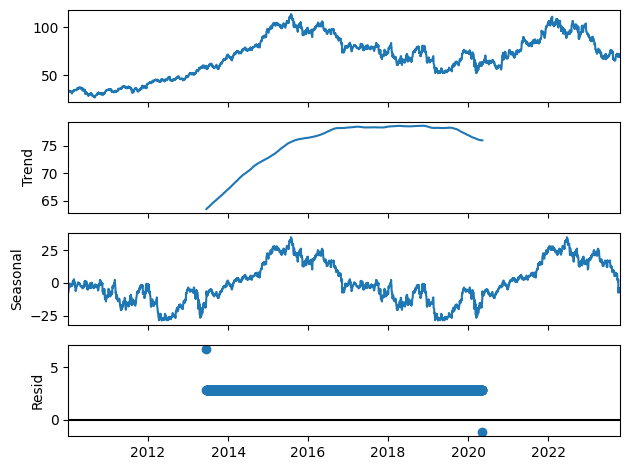

In [92]:
res = sm.tsa.seasonal.seasonal_decompose(closing_data_test, model='additive', period = int(len(closing_data_test)/2))
resplot = res.plot()

In [93]:
import matplotlib.pyplot as plt

In [97]:
CVS_Seasonality=res.seasonal[res.seasonal.index.year == [2010,2023]]
MA1=CVS_Seasonality.rolling(window=20).mean()
plt.plot(CVS_Seasonality, label='CVS Seasonality')
plt.plot(MA1, label='20D MA')
plt.title("Seasonality of CVS", fontsize=18, fontweight='bold')
plt.legend()
plt.show()

ValueError: ('Lengths must match to compare', (3474,), (2,))